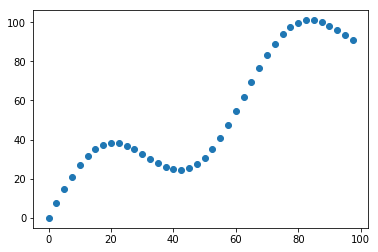

In [27]:
#线性回归
import theano 
import theano.tensor as T
import theano.tensor.nnet as NN

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
x_data=np.arange(100,step=2.5)
y_data=x_data+20*np.sin(x_data/10)   
plt.scatter(x_data,y_data)

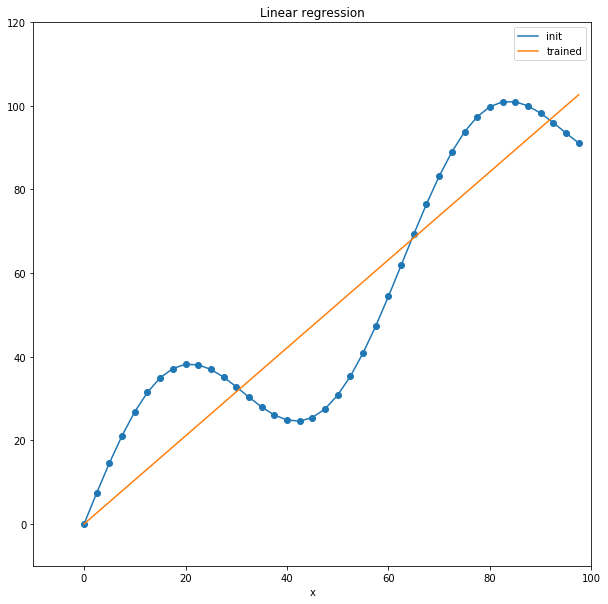

In [47]:
#200个随机数据（0到120之间）
x_test=np.random.rand(200)*120

#定义学习率
learning_rate=1e-4 

#定义输入
x=T.vector()
y=T.vector()

#定义参数
W=theano.shared(np.random.random())
b=theano.shared(np.array(0.0))
params=[W,b]

y_hat=x*W+b

#损失函数
loss=T.mean(0.5*(y_hat-y)**2)

#梯度
grads=theano.grad(loss,params)

param_update=[]
#梯度下降
for p,g in zip(params,grads):
    param_update.append((p,p-learning_rate*g))
    
# 训练函数
train_fun=theano.function([x,y],[loss,y_hat],updates=param_update,allow_input_downcast=True)

# print('Compile')
print_flag=False
fig=plt.figure(figsize=(10,10))
plt.scatter(x_data,y_data)

for i in range(50):
    const,n_out=train_fun(x_data,y_data)
    if i==0:
        plt.plot(x_data,y_data)
    if print_flag:
        print('loss={0:.4f}\tW={1:.4F}\TB={2:.4F}'.format(cost.tolist,W.get_value().tolist(),b.get_value().tolist()))
        
# plot(x,y1,x,y2);x公共坐标，绘制y1,y2两条线
plt.plot(x_data,n_out)
#x轴标签 ylabel y轴标签
plt.xlabel('x')
#标题 不能中文？
plt.title('Linear regression')
#x轴上下限设置
plt.xlim(-10,100)
plt.ylim(-10,120)
plt.legend(['init','trained'])
